In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
import calendar as cl

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper with extract module added
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [6]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Challenge

In [11]:
# Design a query to get June data. 
# Perform a query to retrieve the data, temp and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs)
#complete the query to extract all desired results and put them in a list.
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [12]:
# Design a query to get December data. 
# Perform a query to retrieve the data, temp and precipitation scores
results2 = []
results2 = session.query(Measurement.date, Measurement.prcp, Measurement.tobs)
#complete the query to extract all desired results and put them in a list.
results2 = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_june=pd.DataFrame(results, columns=['date', 'precipitation', 'temp'])
df_june.head()

,date,precipitation,temp
0,2010-06-01,0.00,78.0
1,2010-06-02,0.01,76.0
2,2010-06-03,0.00,78.0
3,2010-06-04,0.00,76.0
4,2010-06-05,0.00,77.0


In [14]:
df_june.describe()

,precipitation,temp
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_dec=pd.DataFrame(results2, columns=['date', 'precipitation', 'temp'])
df_dec.head()

,date,precipitation,temp
0,2010-12-01,0.04,76.0
1,2010-12-03,0.00,74.0
2,2010-12-04,0.00,74.0
3,2010-12-06,0.00,64.0
4,2010-12-07,0.00,64.0


In [16]:
df_dec.describe()

,precipitation,temp
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


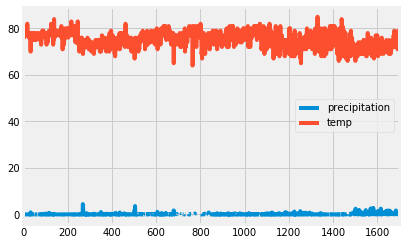

In [17]:
#though not required in module, added a simple plot of the prcp and temp for June
df_june.plot()

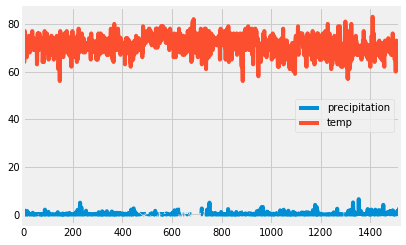

In [18]:
#though not required in module, added a simple plot of the prcp and temp for Dec
df_dec.plot()